# Bank Churners Explainable Machine Learning LIME

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv("data\BankChurners.csv")

In [3]:
len(df.columns)

23

In [4]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## 1. Preprocessing

In [5]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[20:22], axis=1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.describe(include=[object])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [7]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
# # Set the Attrition flag to target to 1 and 0
# df.loc[df['Attrition_Flag'] == "Existing Customer",["Attrition_Flag"]] = 0
# df.loc[df['Attrition_Flag'] == "Attrited Customer",["Attrition_Flag"]] = 1

# df[["Attrition_Flag"]] = df[["Attrition_Flag"]].astype(int)

In [11]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({"Existing Customer": 0, "Attrited Customer": 1})
df['Card_Category'] = df['Card_Category'].map({"Blue": 0, "Silver": 1, "Gold":2, "Platinum":3})
df['Education_Level']= df['Education_Level'].map({"Unknown": 0, "Uneducated": 1, "High School":2, "College":3, "Graduate": 4, "Post-Graduate":5, "Doctorate":6 })
df['Income_Category']= df['Income_Category'].map({"Unknown": 0, "Less than $40K": 1, "$40K - $60K":2, "$60K - $80K":3, "$80K - $120K": 4, "$120K +":5 })
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,4,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,4,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,4,Single,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,0,Divorced,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,2,Married,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,4,Unknown,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [43]:
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level               int64
Marital_Status               object
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## 2. Modelling

* Decision Tree Classifier
* Random Forest Classifier
* XGBoost Classifier
* Hyperparameter tuning with GridSearchCV

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
# Use StandardScaler for normalization
from sklearn.preprocessing import StandardScaler

In [14]:
def oversample(X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='all')
        # Convert to numpy and oversample
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        # Convert back to pandas
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over

In [69]:
np.random.seed(42)

X = df[["Customer_Age","Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]]
y = df["Attrition_Flag"]
# X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Oversample the train data
X_train, y_train = oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(13602, 6)
(2026, 6)


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    '''''
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification
    '''''
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [71]:

# np.random.seed(42)

# X = df.drop(["Attrition_Flag"], axis=1)
# y = df["Attrition_Flag"]
# X = pd.get_dummies(X, drop_first = True)


### 2.1 Decision Tree Classifier

In [72]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = oversample(X_train, y_train)

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)
dtc_metrics = evaluate_preds(y_test, y_pred)

Acc: 92.30%
Precision: 0.78
Recall: 0.73
F1 score: 0.75


In [73]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1631,   68],
       [  88,  239]], dtype=int64)

<AxesSubplot:>

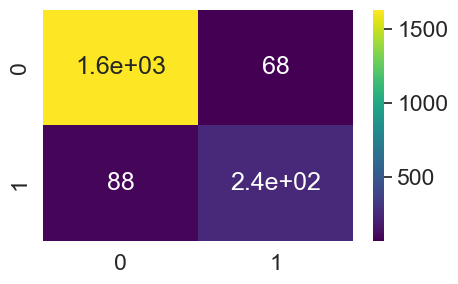

In [74]:
# Plot Confusion Matrix
rcParams['figure.figsize'] = 5,3
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_pred )
sns.heatmap(conf_mat, annot=True, cmap='viridis')

### 2.2 Random Forest Classifier

In [75]:


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rfc_metrics = evaluate_preds(y_test, y_pred)

Acc: 94.62%
Precision: 0.84
Recall: 0.82
F1 score: 0.83


In [76]:
import time
start_time = time.time()
importances = rf.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.006 seconds


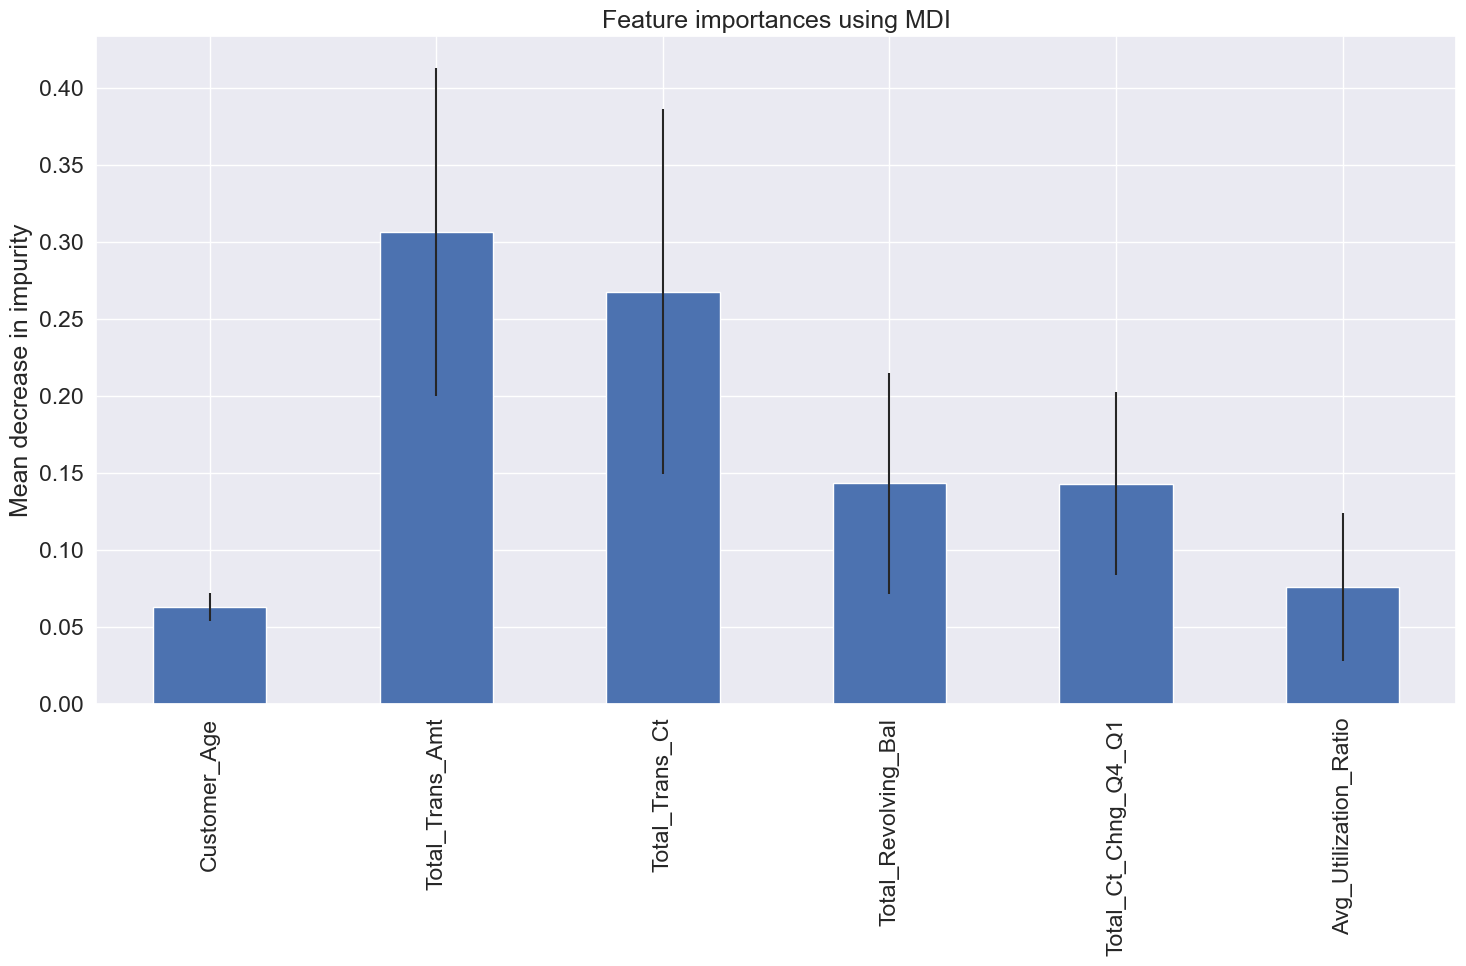

In [77]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(15, 10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1649,   50],
       [  59,  268]], dtype=int64)

<AxesSubplot:>

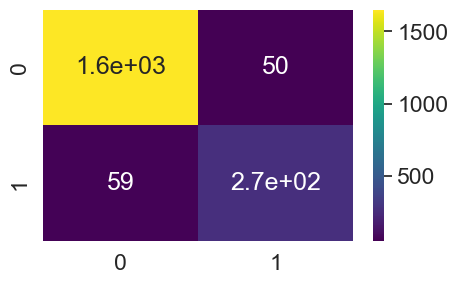

In [79]:
# Plot Confusion Matrix
rcParams['figure.figsize'] = 5,3
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_pred )
sns.heatmap(conf_mat, annot=True, cmap='viridis')

### 2.3 XGBoost Classifier

In [80]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
xgb_metrics = evaluate_preds(y_test, y_pred)

Acc: 94.67%
Precision: 0.83
Recall: 0.84
F1 score: 0.84


In [81]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1644,   55],
       [  53,  274]], dtype=int64)

<AxesSubplot:>

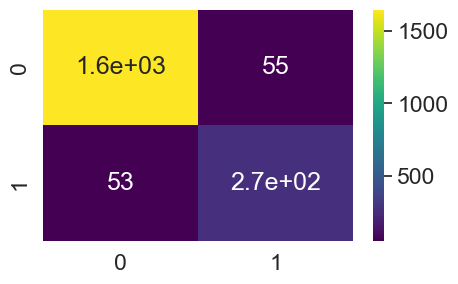

In [82]:
# Plot Confusion Matrix
rcParams['figure.figsize'] = 5,3
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_pred )
sns.heatmap(conf_mat, annot=True, cmap='viridis')

### 2.4 Hyperparameter tuning with GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[150,300,450],
         'learning_rate':[0.01,0.1,1],
         'max_depth':[1,2,3,4,5]}
grid = GridSearchCV(xgb, param_grid = params, cv = 5, n_jobs = -1)
grid.fit(X_train,y_train);

In [63]:
grid.best_params_, grid.best_score_

({'learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}, 0.9913249346044923)

In [64]:
y_pred = grid.predict(X_test)
grid_metrics = evaluate_preds(y_test, y_pred)

Acc: 96.20%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


<AxesSubplot:>

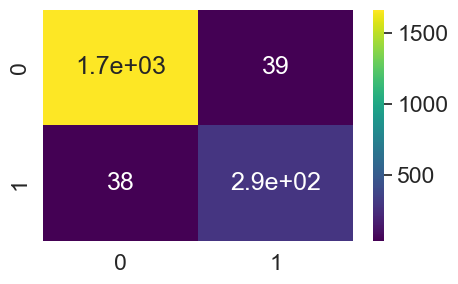

In [65]:
# Plot Confusion Matrix
rcParams['figure.figsize'] = 5,3
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_pred )
sns.heatmap(conf_mat, annot=True, cmap='viridis')

In [66]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn.score(X_test,y_test)


0.9230009871668312

In [68]:
X_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,54.0,1.0,0.0,0.0,0.0,36.0,1.0,3.0,3.0,3723.0,...,1995.0,0.595,8554.0,99.0,0.678,0.464,0.0,0.0,1.0,0.0
1,58.0,4.0,2.0,0.0,0.0,48.0,1.0,4.0,3.0,5396.0,...,3593.0,0.493,2107.0,39.0,0.393,0.334,0.0,1.0,0.0,0.0
2,45.0,4.0,0.0,1.0,2.0,36.0,6.0,1.0,3.0,15987.0,...,14339.0,0.732,1436.0,36.0,1.250,0.103,0.0,0.0,1.0,0.0
3,34.0,2.0,4.0,1.0,0.0,36.0,4.0,3.0,4.0,3625.0,...,1108.0,1.158,2616.0,46.0,1.300,0.694,0.0,0.0,1.0,0.0
4,49.0,2.0,2.0,2.0,0.0,39.0,5.0,3.0,4.0,2720.0,...,794.0,0.602,3806.0,61.0,0.794,0.708,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13597,41.0,4.0,0.0,0.0,0.0,25.0,2.0,2.0,3.0,29295.0,...,29295.0,1.411,9865.0,65.0,0.711,0.000,0.0,0.0,1.0,0.0
13598,54.0,3.0,2.0,4.0,0.0,36.0,2.0,3.0,4.0,9457.0,...,9107.0,1.024,1196.0,28.0,0.333,0.037,1.0,1.0,0.0,0.0
13599,46.0,2.0,6.0,4.0,0.0,29.0,1.0,2.0,5.0,17667.0,...,17667.0,0.569,1775.0,42.0,0.556,0.000,1.0,1.0,0.0,0.0
13600,51.0,1.0,2.0,1.0,0.0,43.0,4.0,3.0,3.0,1665.0,...,144.0,0.874,2878.0,45.0,0.452,0.914,0.0,1.0,0.0,0.0


In [67]:
attr_prediction = knn.predict(

SyntaxError: unexpected EOF while parsing (845196142.py, line 1)

## 3. Models Evaluation

In [ ]:
compare_metrics = pd.DataFrame({"Decision Tree Classifier" : dtc_metrics,
                              "Random Forest Classifier":rfc_metrics,
                              "XGBoost Classifier": xgb_metrics,
                              "Grid Search CV": grid_metrics})
compare_metrics.plot.bar(figsize = (20,9),rot = 1)

## 4. LIME visualization

In [35]:
from interpret.blackbox import LimeTabular


# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(xgb.fit(X_train,y_train), 
                   data=X_train, 
                   random_state=1)

In [36]:
from interpret import show

# Get local explanations
lime_local = lime.explain_local(X_test[-40:-30], 
                                y_test[-40:-30], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/1586553453440/ -->